<a href="https://colab.research.google.com/github/SurajSharma0204/Mygooglecolab/blob/main/EDA_Assignment_12th_March_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")
%matplotlib inline

pd.set_option('display.max_columns', 30)

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")


# New Section

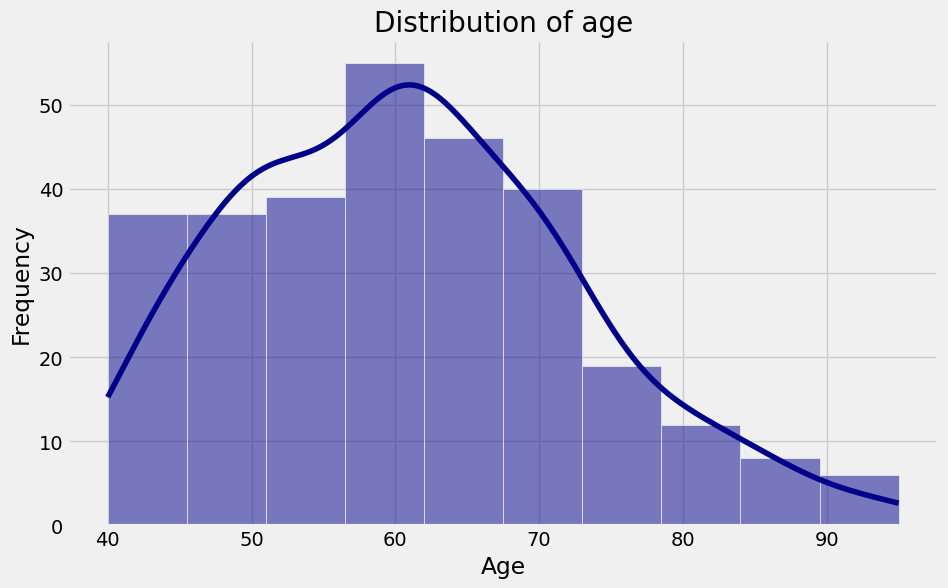

In [ ]:

#1.What is the distribution of age among heart failure patients in the dataset?


plt.figure(figsize = (10, 6))
sns.histplot(df['age'].dropna(), kde = True, color = 'darkblue')
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#the mean age is around 60
#most of the people are around 60 to 70
#80-90 low no of people

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# Descriptive Statistics

print(df['age'].describe())

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64


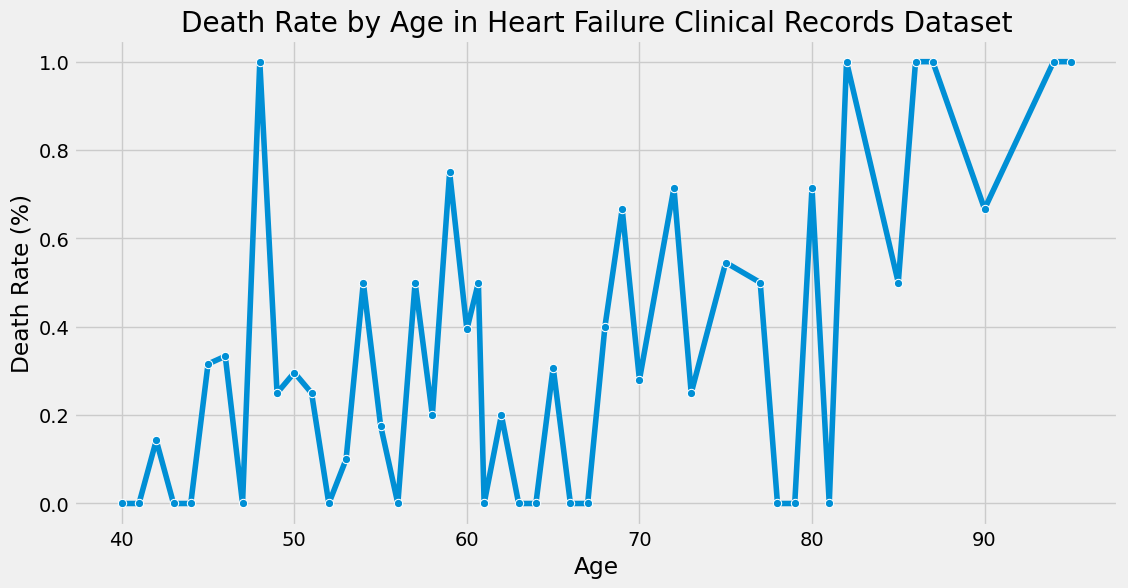

In [ ]:
#2. How does the death rate vary with age?

death_rate_by_age = df.groupby('age')['DEATH_EVENT'].mean().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=death_rate_by_age, x='age', y='DEATH_EVENT', marker='o')
plt.title('Death Rate by Age in Heart Failure Clinical Records Dataset')
plt.xlabel('Age')
plt.ylabel('Death Rate (%)')
plt.grid(True)
plt.show()

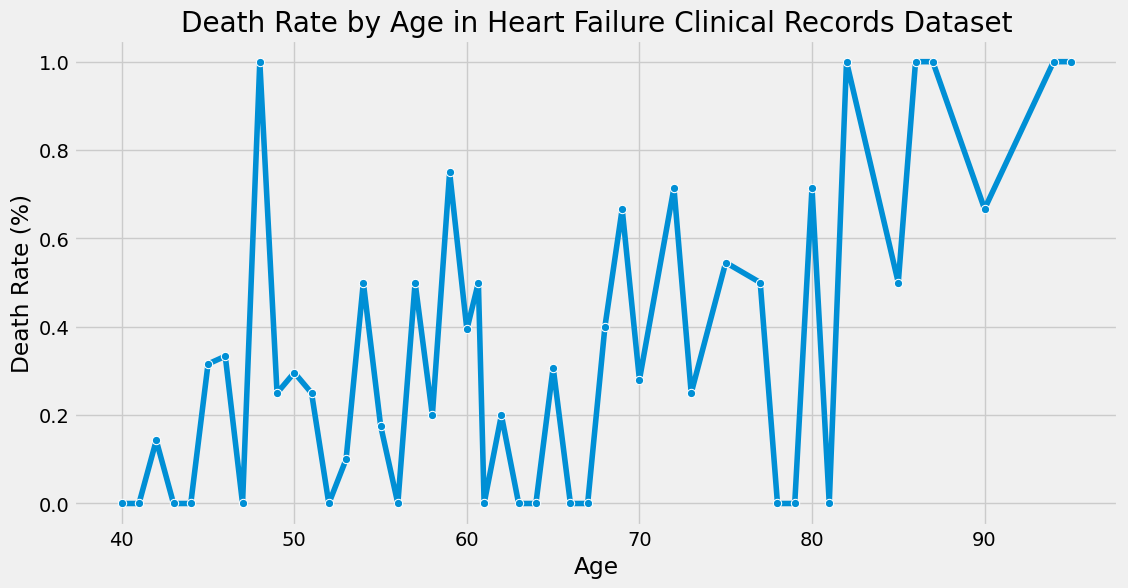

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=death_rate_by_age, x='age', y='DEATH_EVENT', marker='o')
plt.title('Death Rate by Age in Heart Failure Clinical Records Dataset')
plt.xlabel('Age')
plt.ylabel('Death Rate (%)')
plt.grid(True)
plt.show()


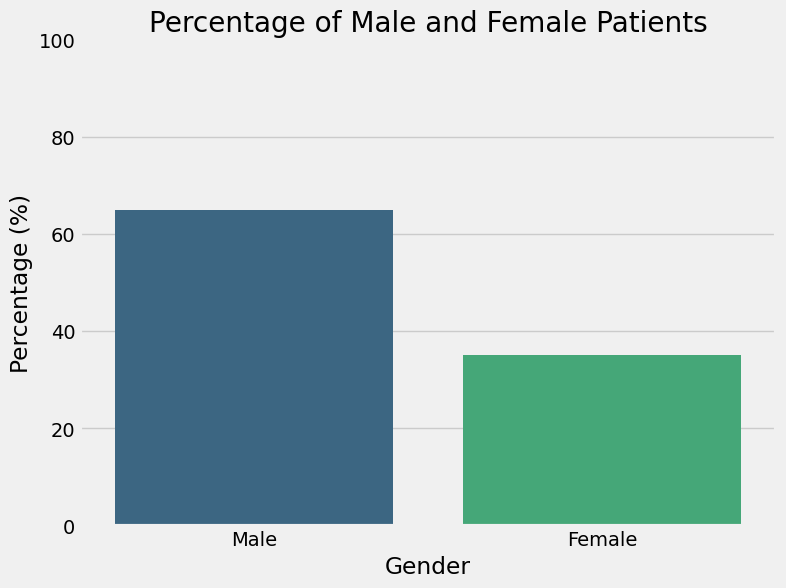

In [ ]:
#3.What is the percentage of male and female patients in the dataset?

import matplotlib.pyplot as plt
import seaborn as sns

total_patients = len(df)
male_count = len(df[df['sex'] == 1])
female_count = len(df[df['sex'] == 0])
percentage_male = (male_count / total_patients) * 100
percentage_female = (female_count / total_patients) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=['Male', 'Female'], y=[percentage_male, percentage_female], palette='viridis')
plt.title('Percentage of Male and Female Patients')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.show()




In [ ]:
#65% are male and 35% are female patients

In [ ]:
#4 How does the platelets count vary among different age groups?

In [ ]:
# Descriptive Statistics

print(df['platelets'].describe())

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64


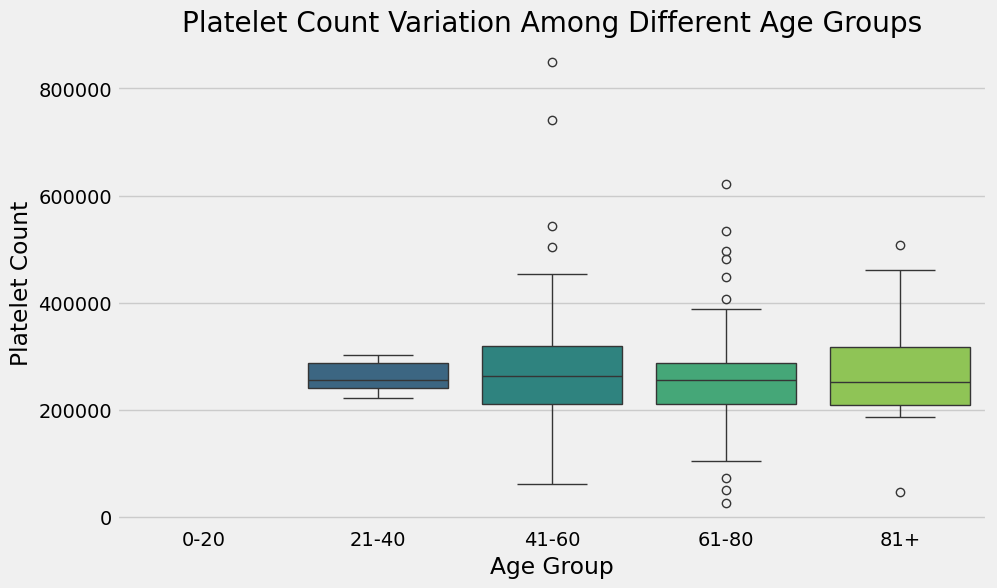

           count           mean            std       min       25%        50%  \
age_group                                                                       
0-20         0.0            NaN            NaN       NaN       NaN        NaN   
21-40        7.0  262428.571429   32567.146753  222000.0  240500.0  255000.00   
41-60      155.0  268171.963806  106473.414123   62000.0  211500.0  263358.03   
61-80      119.0  255787.229412   86870.097290   25100.0  211500.0  255000.00   
81+         18.0  272317.558889  107383.466825   47000.0  209500.0  252500.00   

                75%       max  
age_group                      
0-20            NaN       NaN  
21-40      288000.0  303000.0  
41-60      319000.0  850000.0  
61-80      286500.0  621000.0  
81+        317250.0  507000.0  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Clean the dataset (assuming no missing values or outliers for simplicity)

# Bin the age column into different age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81+'])

# Calculate statistics of platelet count for each age group
platelet_stats_by_age_group = df.groupby('age_group')['platelets'].describe()

# Visualize the data using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='platelets', data=df, palette='viridis')
plt.title('Platelet Count Variation Among Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.show()

# Print the statistics for insights
print(platelet_stats_by_age_group)


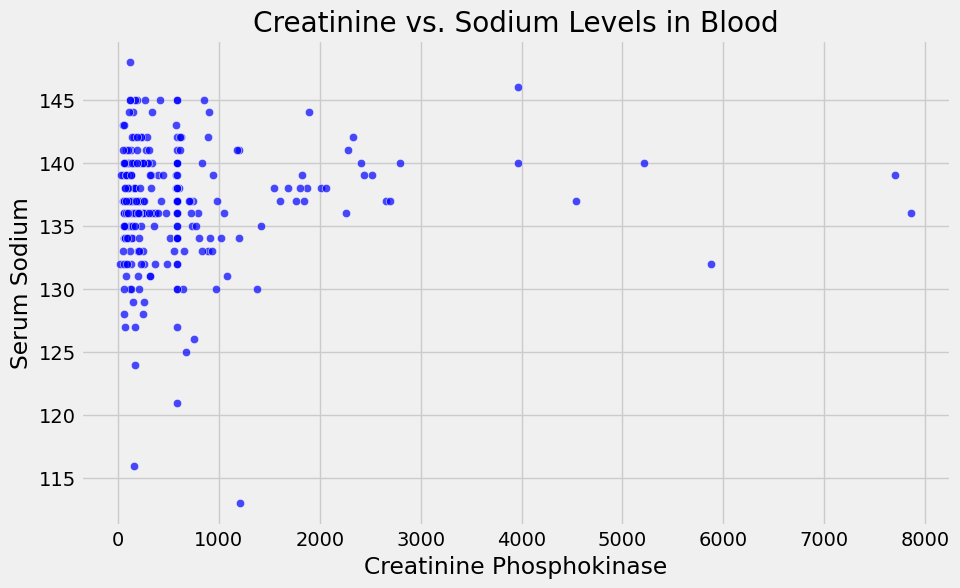

Correlation between creatinine and sodium levels: 0.05955015583372577


In [ ]:
# 5. Is there a correlation between crinitine and sodium level in the blood?




import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Clean the dataset (assuming no missing values or outliers for simplicity)

# Visualize the data using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='creatinine_phosphokinase', y='serum_sodium', data=df, alpha=0.7, color= 'blue')
plt.title('Creatinine vs. Sodium Levels in Blood')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('Serum Sodium')
plt.show()

# Calculate the correlation coefficient
correlation = df['creatinine_phosphokinase'].corr(df['serum_sodium'])
print(f"Correlation between creatinine and sodium levels: {correlation}")

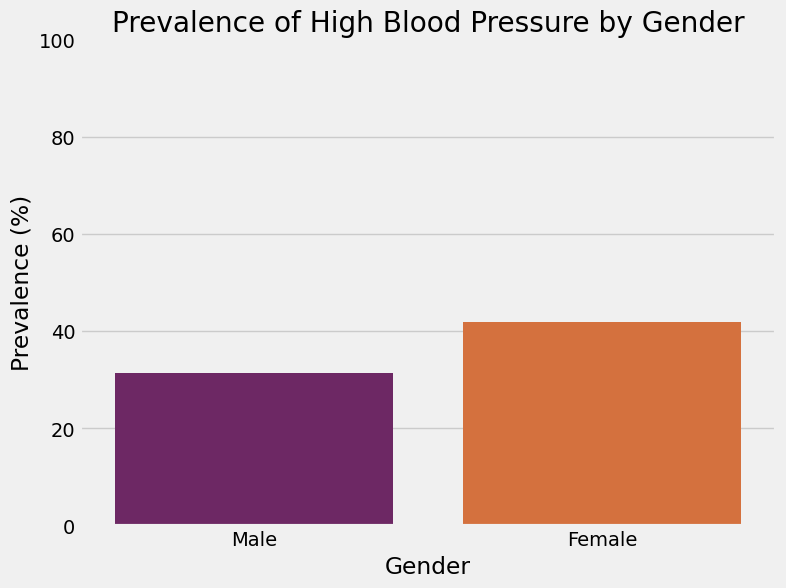

In [ ]:
#6.How does the prevalence of high blood pressure differ between male and female pateints?


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Calculate the prevalence of high blood pressure for male and female patients
total_male = len(df[df['sex'] == 1])
total_female = len(df[df['sex'] == 0])

male_with_high_bp = len(df[(df['sex'] == 1) & (df['high_blood_pressure'] == 1)])
female_with_high_bp = len(df[(df['sex'] == 0) & (df['high_blood_pressure'] == 1)])

prevalence_male = (male_with_high_bp / total_male) * 100
prevalence_female = (female_with_high_bp / total_female) * 100

# Visualize the data using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Male', 'Female'], y=[prevalence_male, prevalence_female], palette='inferno')
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Prevalence (%)')
plt.ylim(0, 100)
plt.show()




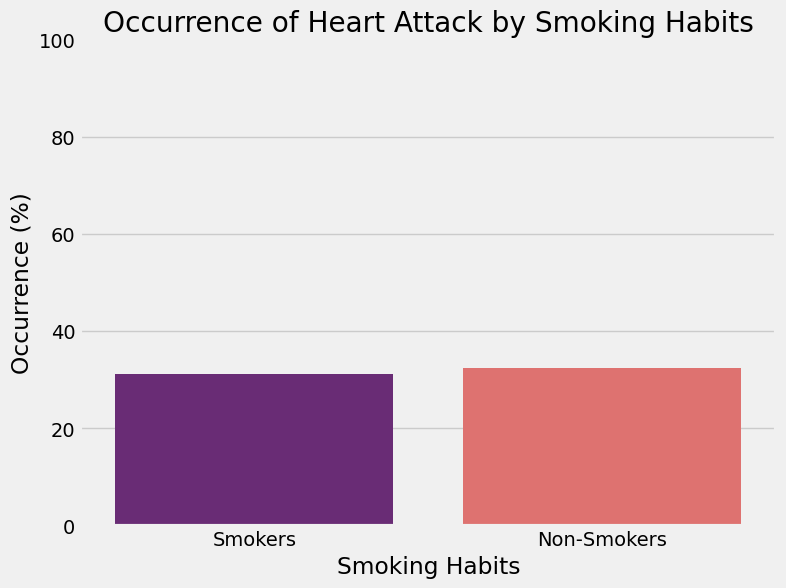

Occurrence of heart attack among smokers: 31.25%
Occurrence of heart attack among non-smokers: 32.51%


In [ ]:
#7. What is the relationship between smoking habits and the occurrence of heart attack?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Calculate the occurrence of heart attack for smokers and non-smokers
total_smokers = len(df[df['smoking'] == 1])
total_non_smokers = len(df[df['smoking'] == 0])

heart_attack_smokers = len(df[(df['smoking'] == 1) & (df['DEATH_EVENT'] == 1)])
heart_attack_non_smokers = len(df[(df['smoking'] == 0) & (df['DEATH_EVENT'] == 1)])

occurrence_smokers = (heart_attack_smokers / total_smokers) * 100
occurrence_non_smokers = (heart_attack_non_smokers / total_non_smokers) * 100

# Visualize the data using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Smokers', 'Non-Smokers'], y=[occurrence_smokers, occurrence_non_smokers], palette='magma')
plt.title('Occurrence of Heart Attack by Smoking Habits')
plt.xlabel('Smoking Habits')
plt.ylabel('Occurrence (%)')
plt.ylim(0, 100)
plt.show()

# Print the occurrence for insights
print(f"Occurrence of heart attack among smokers: {occurrence_smokers:.2f}%")
print(f"Occurrence of heart attack among non-smokers: {occurrence_non_smokers:.2f}%")

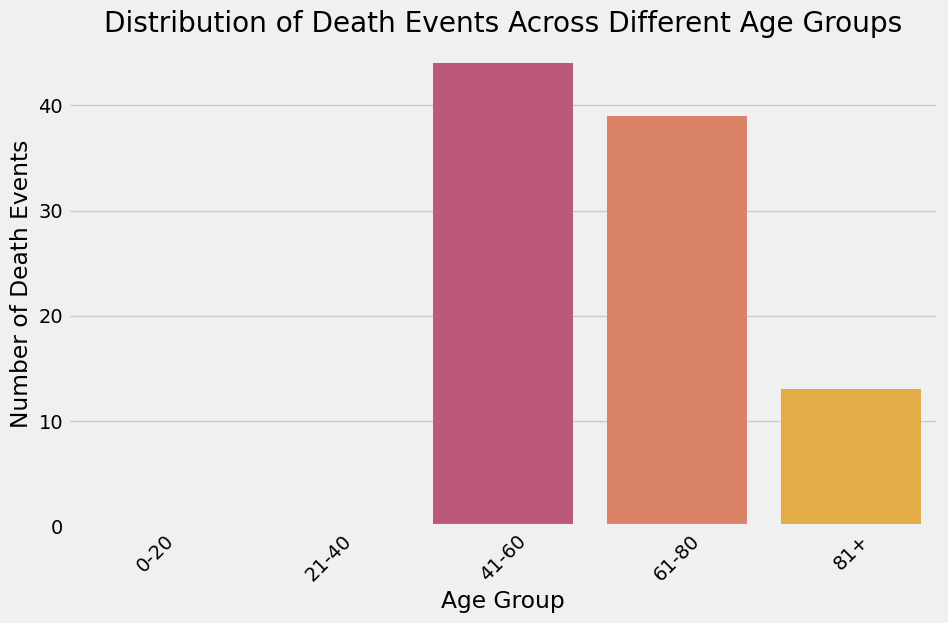

In [ ]:
#8. Are there any noticeable patterns in the distribution of death events across different age group?


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Clean the dataset (assuming no missing values or outliers for simplicity)

# Bin the age column into different age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81+'])

# Calculate the distribution of death events for each age group
death_events_by_age_group = df.groupby('age_group')['DEATH_EVENT'].sum()

# Visualize the data using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=death_events_by_age_group.index, y=death_events_by_age_group.values, palette='plasma')
plt.title('Distribution of Death Events Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Death Events')
plt.xticks(rotation=45)
plt.show()

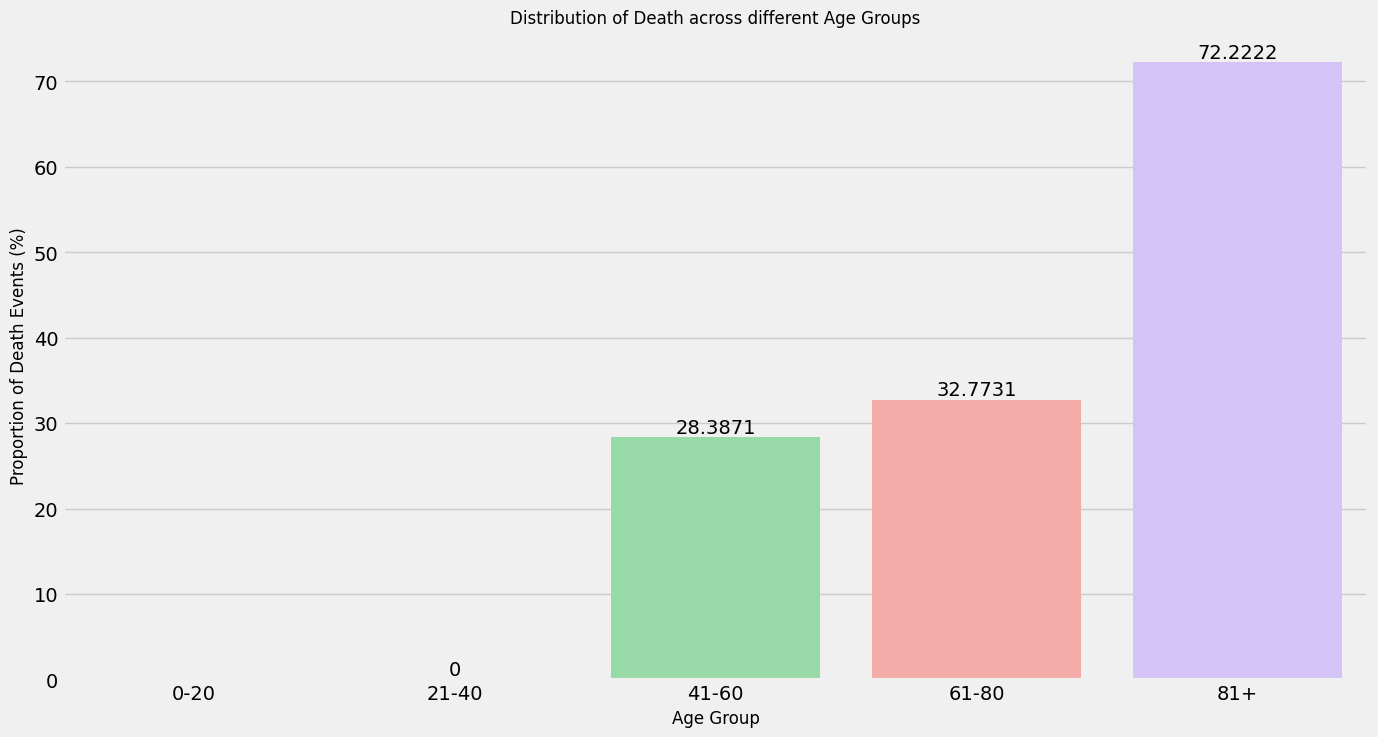

In [ ]:
#8 2nd method

len(df[(df['DEATH_EVENT']==1) & (df['age_group']==60)])
death_event_count = df.groupby('age_group')['DEATH_EVENT'].sum()
total_count_by_age_group = df['age_group'].value_counts()
proportion_by_age_group = (death_event_count / total_count_by_age_group) * 100

#Plot
plt.figure(figsize=(15,8))
fig = sns.barplot(x=proportion_by_age_group.index, y=proportion_by_age_group.values, palette='pastel')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Proportion of Death Events (%)', fontsize=12)
plt.title('Distribution of Death across different Age Groups', fontsize=12)

for bars in fig.containers:
  fig.bar_label(bars)

plt.show()

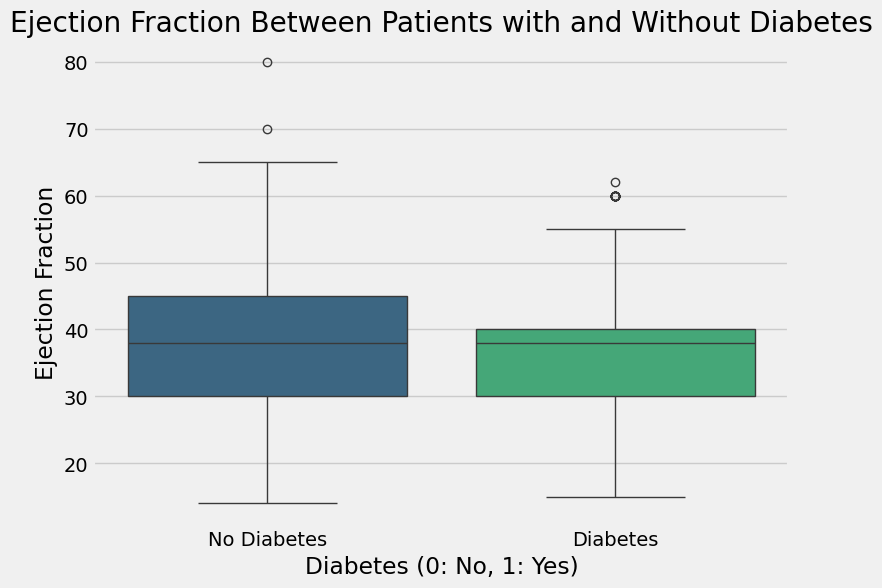

Mean ejection fraction for patients with diabetes: 38.02
Mean ejection fraction for patients without diabetes: 38.13


In [ ]:
#9. Is there any significant difference in ejection fraction between patients with and without diabetes?


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Clean the dataset (assuming no missing values or outliers for simplicity)

# Calculate the mean ejection fraction for patients with and without diabetes
mean_ef_diabetes = df[df['diabetes'] == 1]['ejection_fraction'].mean()
mean_ef_no_diabetes = df[df['diabetes'] == 0]['ejection_fraction'].mean()

# Visualize the data using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='ejection_fraction', data=df, palette='viridis')
plt.title('Ejection Fraction Between Patients with and Without Diabetes')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Ejection Fraction')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()

# Print the mean ejection fraction for insights
print(f"Mean ejection fraction for patients with diabetes: {mean_ef_diabetes:.2f}")
print(f"Mean ejection fraction for patients without diabetes: {mean_ef_no_diabetes:.2f}")

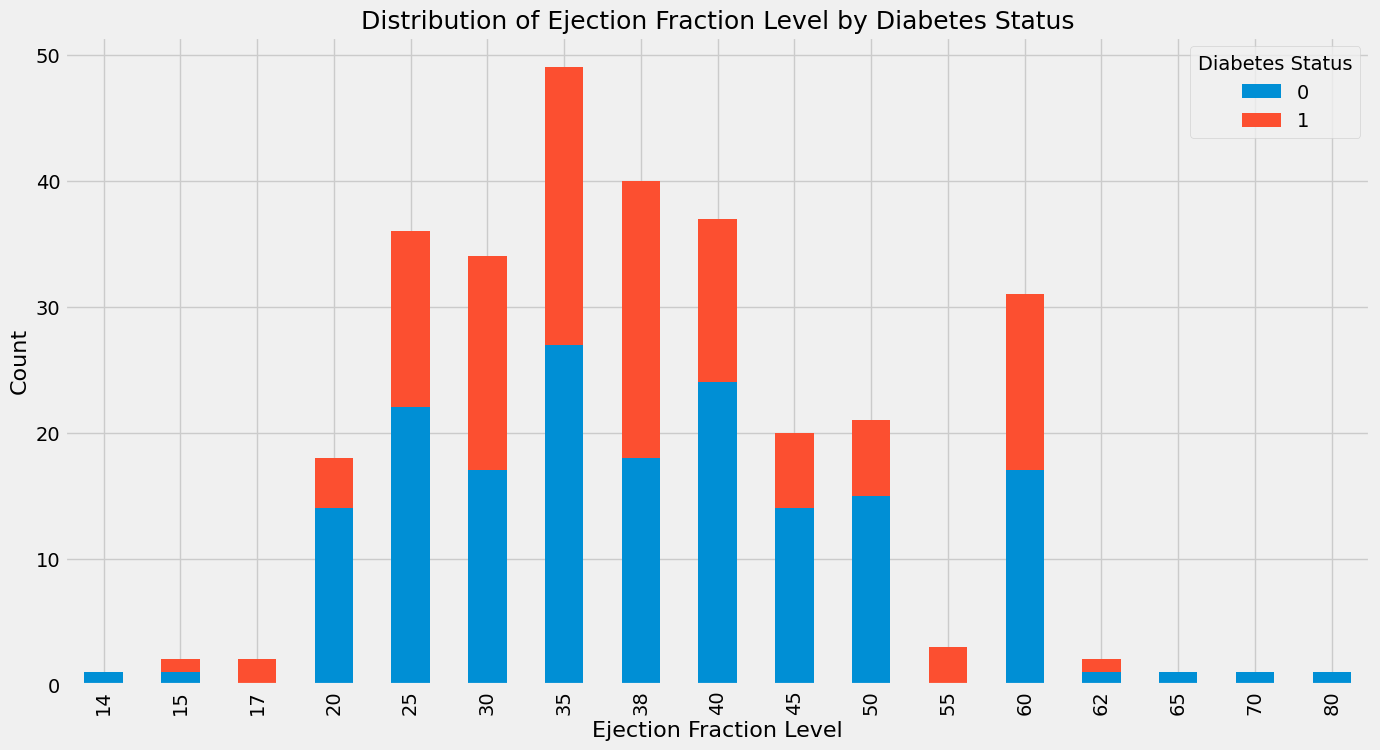

In [ ]:
#2nd method

# Grouping the data by ejection fraction and diabetes status
grouped = df.groupby(['ejection_fraction', 'diabetes']).size().unstack()

# Plotting the stacked bar plot
plt.figure(figsize=(15, 8))
grouped.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Ejection Fraction Level', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Distribution of Ejection Fraction Level by Diabetes Status', fontsize=18)
plt.legend(title='Diabetes Status')
plt.show()

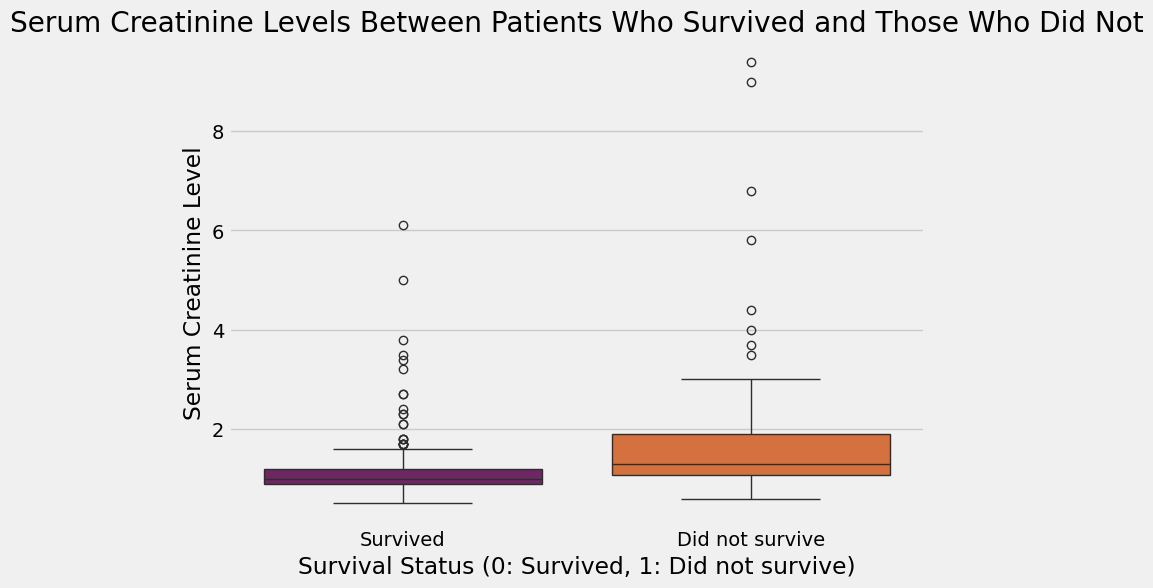

In [ ]:
#10. How does the serum creatine level vary between patients who survived and those who did not?


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Clean the dataset (assuming no missing values or outliers for simplicity)

# Visualize the data using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df, palette='inferno')
plt.title('Serum Creatinine Levels Between Patients Who Survived and Those Who Did Not')
plt.xlabel('Survival Status (0: Survived, 1: Did not survive)')
plt.ylabel('Serum Creatinine Level')
plt.xticks(ticks=[0, 1], labels=['Survived', 'Did not survive'])
plt.show()